# <b>Домашнее задание. Решение конкурса на kaggle.com</b>

## <b>1. Исследование</b>

### <b>1.1 Загрузка данных</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'homework_3_train.csv'
df_full_train = pd.read_csv(data)
df_full_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


### <b>1.2 Подготовка данных</b>

In [3]:
df_full_train.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [4]:
categorical_columns = list(df_full_train.dtypes[df_full_train.dtypes == 'object'].index)

for column in categorical_columns:
    df_full_train[column] = df_full_train[column].str.lower().str.replace(' ', '_')
    
df_full_train['TotalSpent'] = pd.to_numeric(df_full_train['TotalSpent'], errors='coerce')
df_full_train['TotalSpent'] = df_full_train['TotalSpent'].fillna(0)

In [5]:
df_full_train.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
numerical = ['ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

categorical = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

### <b>1.3 Анализ данных</b>

<b>Численные признаки</b>

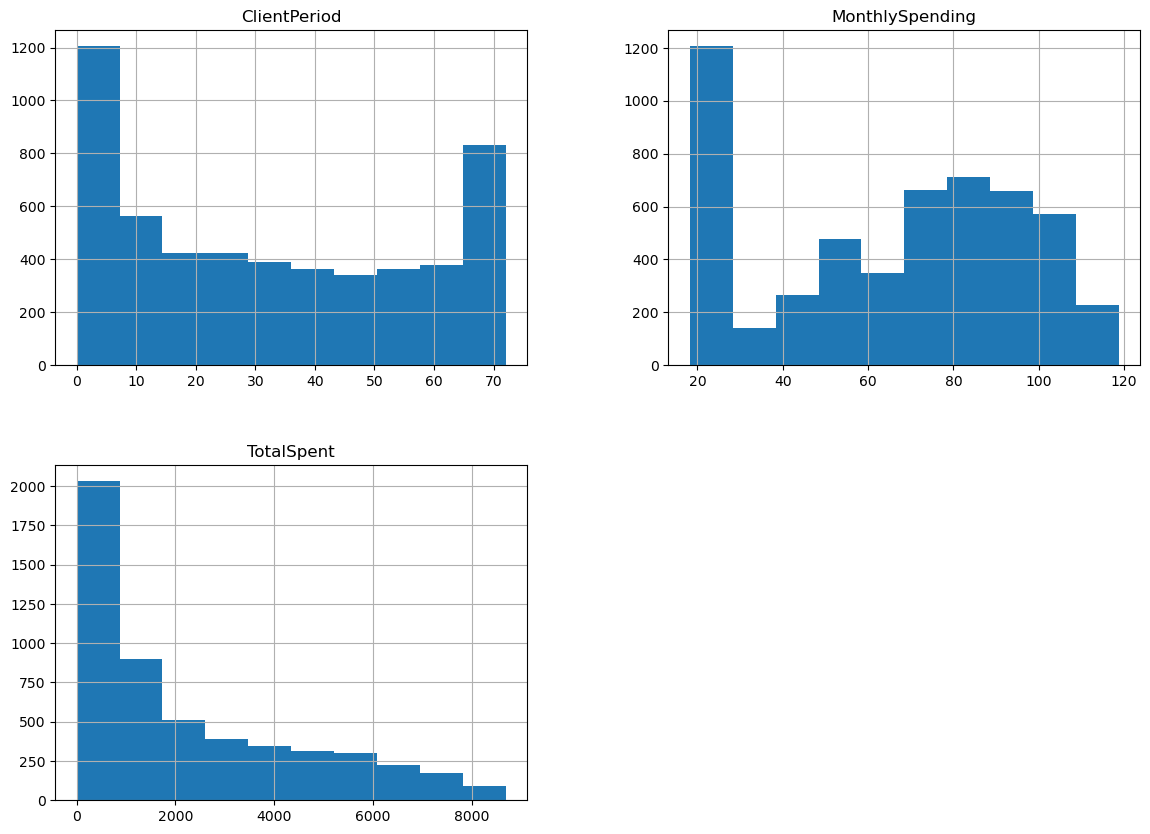

In [8]:
df_full_train.hist(column=numerical, figsize=(14, 10));

<b>Категориальные признаки</b>

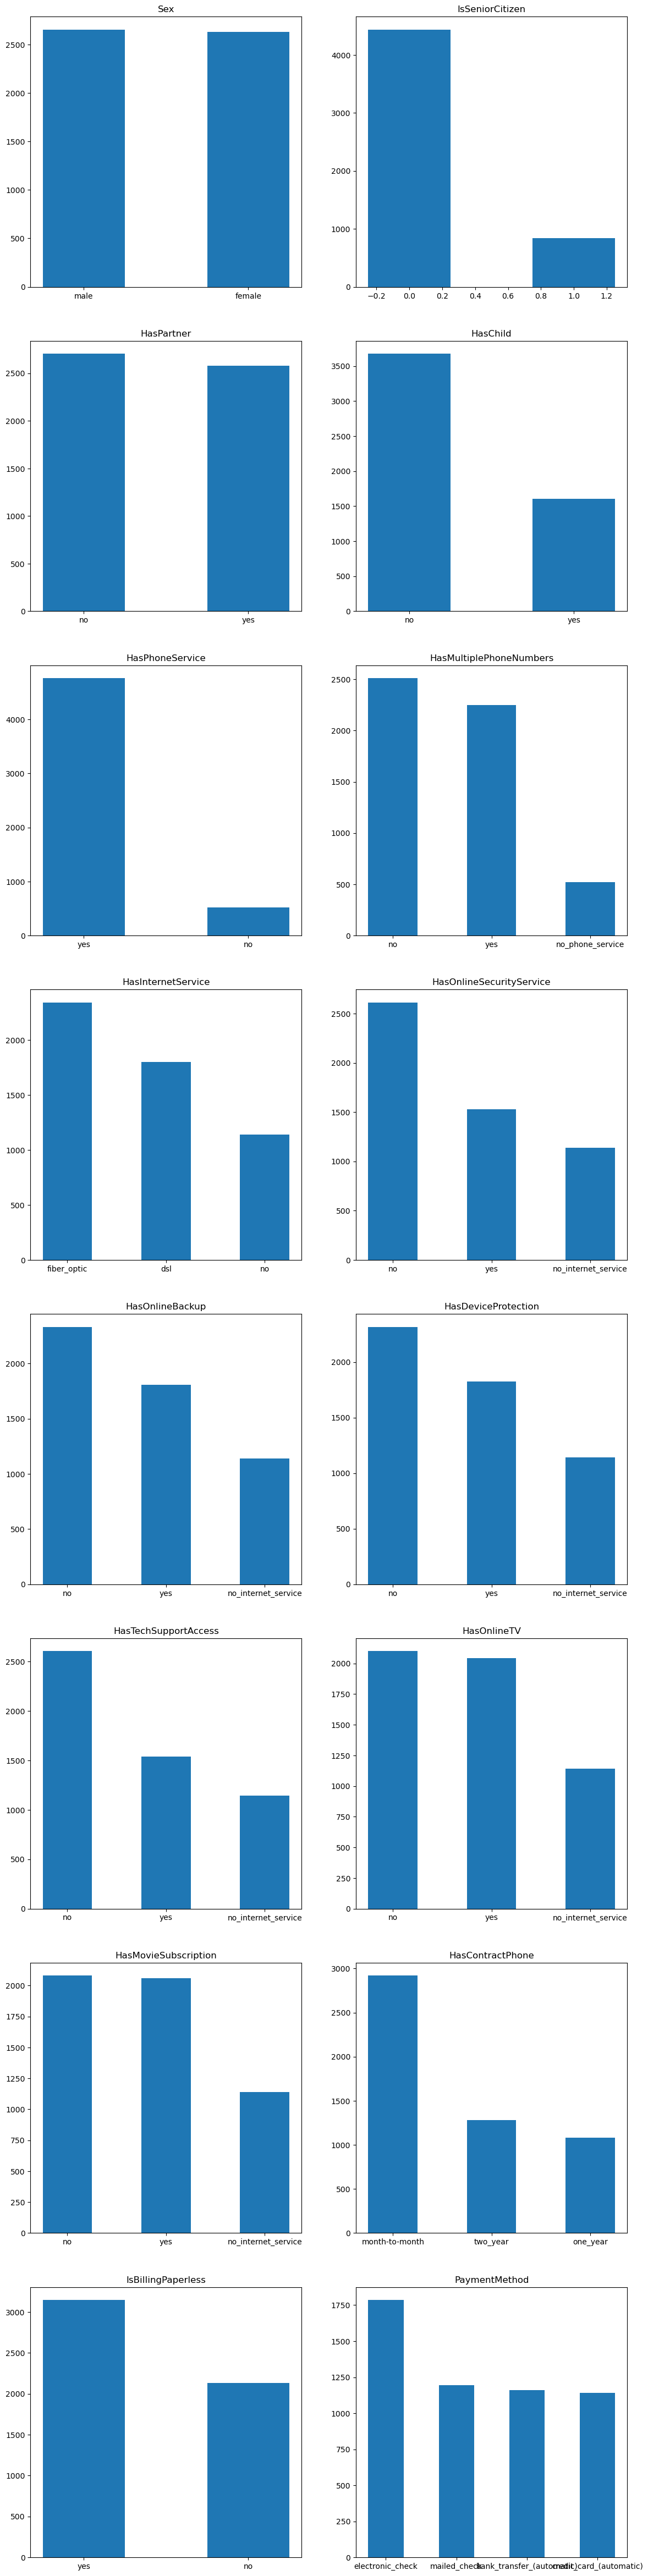

In [34]:
fig, ax = plt.subplots(8, 2)
plt.rcParams["figure.figsize"] = (14, 60)
cnt = 0

for i in range(8):
    for j in range(2):
        feature_dict = df_full_train[categorical[cnt]].value_counts().to_dict()      
        ax[i][j].bar(list(feature_dict.keys()), list(feature_dict.values()), width=0.5);
        ax[i][j].set_title(categorical[cnt])
        
        cnt += 1

<b>Распределение целевой переменной</b>

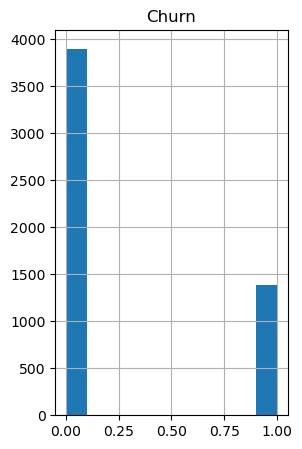

In [10]:
df_full_train.hist(column='Churn', figsize=(3, 5));

In [11]:
round((df_full_train['Churn'] == 0).sum() / len(df_full_train), 2)

0.74

Представим гипотетическую модель на основе "беспечного алгоритма" (т. н. Dummy Model), которая бы выдавала нам предсказание, что независимо от параметров оттока клиентов нет. В этом случае мы получили бы неплохую точность в 74 процента. Отсюда можно сделать вывод, что мы имеем дело с несбалансированными классами.

### <b>1.4 Применение линейных моделей</b>

При построении моделей в этом пункте, было произведено разделение на train/val до кодирования и нормирования признаков с целью избежания "ликов" из val части в train часть.

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

<b>Вычисление лучшего качества с помощью автоматического подбора параметра C, используя LogisticRegressionCV</b>

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train['Churn'].values
y_val = df_val['Churn'].values

del df_train['Churn']
del df_val['Churn']

In [14]:
df_train = pd.get_dummies(df_train, columns=categorical)
categorical_new = []
for column in categorical:
    categorical_new.extend(filter(lambda x: x.startswith(column), df_train.columns))

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[numerical + categorical_new])

In [16]:
df_val = pd.get_dummies(df_val, columns=categorical)
categorical_new = []
for column in categorical:
    categorical_new.extend(filter(lambda x: x.startswith(column), df_val.columns))

In [17]:
X_val = scaler.transform(df_val[numerical + categorical_new])

In [18]:
model = LogisticRegressionCV(scoring='roc_auc', refit=True)
model.fit(X_train, y_train)

auc = model.score(X_val, y_val)
print(f'ROC AUC score is {round(auc, 4)}')

ROC AUC score is 0.827


<b>Вычисление лучшего качества с помощью ручного перебора параметра C и класса KFold</b>

In [19]:
def train(df_train, y_train, C):
    df_train = pd.get_dummies(df_train, columns=categorical)
    categorical_new = []
    for column in categorical:
        categorical_new.extend(filter(lambda x: x.startswith(column), df_train.columns))
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(df_train[numerical + categorical_new])
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return scaler, model

In [20]:
def predict(df, scaler, model):
    df = pd.get_dummies(df, columns=categorical)
    categorical_new = []
    for column in categorical:
        categorical_new.extend(filter(lambda x: x.startswith(column), df.columns))
    
    X = scaler.transform(df[numerical + categorical_new])
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [21]:
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.Churn.values
        y_val = df_val.Churn.values

        scaler, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, scaler, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print(f'C = {C} {round(np.mean(scores), 4)} +- {round(np.std(scores), 4)}')

C = 0.001 0.8374 +- 0.018
C = 0.01 0.8426 +- 0.0172
C = 0.1 0.8446 +- 0.017
C = 0.5 0.8451 +- 0.0166
C = 1 0.8452 +- 0.0166
C = 5 0.8452 +- 0.0169
C = 10 0.8452 +- 0.017
C = 100 0.8452 +- 0.0171


Лучшее качество по метрике ROC AUC - 0.8452. Параметр C = 5.

### <b>1.5 Применение градиентного бустинга</b>

In [22]:
import catboost

In [23]:
df_full_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,mailed_check,0
1,72,25.85,1872.20,male,0,yes,no,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,credit_card_(automatic),0
2,1,75.90,75.90,male,0,no,no,yes,no,fiber_optic,no,no,no,yes,no,no,month-to-month,yes,electronic_check,1
3,32,79.30,2570.00,female,1,yes,no,yes,yes,fiber_optic,no,no,yes,no,no,no,month-to-month,no,mailed_check,0
4,60,115.25,6758.45,female,0,yes,yes,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,no,credit_card_(automatic),0


In [24]:
categorical_indices = np.array(range(3, 19))

In [25]:
X_full_train = df_full_train.iloc[:, :-1]
y = df_full_train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X_full_train.values, y.values, train_size=0.8, random_state=42)

<b>Тестирование catboost cо стандартными параметрами</b>

In [26]:
boosting_model = catboost.CatBoostClassifier(cat_features=categorical_indices, verbose=False)
boosting_model.fit(X_train, y_train)

y_pred = boosting_model.predict_proba(X_val)[:, 1]

In [27]:
auc = roc_auc_score(y_val, y_pred)
print(f'ROC AUC score is {round(auc, 4)}')

ROC AUC score is 0.8234


<b>Подбор гиперпараметров</b>

In [28]:
for iterations in [100, 200, 300, 400, 500]:
    for lr in list(np.linspace(0.001, 0.1, num=8)):
        boosting_model = catboost.CatBoostClassifier(iterations = iterations, learning_rate=lr, cat_features=categorical_indices, verbose=False)
        boosting_model.fit(X_train, y_train)

        y_pred = boosting_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        print(f'Iterations = {iterations} Learning Rate = {round(lr, 4)} Score = {round(auc, 4)}')

Iterations = 100 Learning Rate = 0.001 Score = 0.7864
Iterations = 100 Learning Rate = 0.0151 Score = 0.8046
Iterations = 100 Learning Rate = 0.0293 Score = 0.8193
Iterations = 100 Learning Rate = 0.0434 Score = 0.8239
Iterations = 100 Learning Rate = 0.0576 Score = 0.8242
Iterations = 100 Learning Rate = 0.0717 Score = 0.8267
Iterations = 100 Learning Rate = 0.0859 Score = 0.8257
Iterations = 100 Learning Rate = 0.1 Score = 0.8278
Iterations = 200 Learning Rate = 0.001 Score = 0.8069
Iterations = 200 Learning Rate = 0.0151 Score = 0.8277
Iterations = 200 Learning Rate = 0.0293 Score = 0.8287
Iterations = 200 Learning Rate = 0.0434 Score = 0.8291
Iterations = 200 Learning Rate = 0.0576 Score = 0.8258
Iterations = 200 Learning Rate = 0.0717 Score = 0.8234
Iterations = 200 Learning Rate = 0.0859 Score = 0.8212
Iterations = 200 Learning Rate = 0.1 Score = 0.8207
Iterations = 300 Learning Rate = 0.001 Score = 0.8087
Iterations = 300 Learning Rate = 0.0151 Score = 0.8293
Iterations = 300 Le

Лучшее качество по метрике ROC AUC - 0.8302 при параметрах "iterations" = 300 и "learning rate" = 0.293

## <b>2. Предсказание</b>

### <b>2.1 Загрузка данных</b>

In [29]:
test_data = 'homework_3_test.csv'
df_test = pd.read_csv(test_data)
df_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


### <b>2.2 Подготовка данных в тестовой выборке</b>

In [30]:
categorical_columns = list(df_test.dtypes[df_test.dtypes == 'object'].index)

for column in categorical_columns:
    df_test[column] = df_test[column].str.lower().str.replace(' ', '_')
    
df_test['TotalSpent'] = pd.to_numeric(df_test['TotalSpent'], errors='coerce')
df_test['TotalSpent'] = df_test['TotalSpent'].fillna(0)
df_test.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

### <b>2.3 Использование лучшей модели для предсказаний</b>

Лучшая модель - LogisticRegression с параметром C = 5.

In [31]:
df_for_best_model = df_full_train
y_for_best_model = df_for_best_model['Churn']

del df_for_best_model['Churn']

df_for_best_model = pd.get_dummies(df_for_best_model, columns=categorical)
categorical_new = []
for column in categorical:
    categorical_new.extend(filter(lambda x: x.startswith(column), df_for_best_model.columns))

scaler = StandardScaler()
X_for_best_model = scaler.fit_transform(df_for_best_model[numerical + categorical_new])

best_model = LogisticRegression(C=5, max_iter=1000)
best_model.fit(X_for_best_model, y_for_best_model)

LogisticRegression(C=5, max_iter=1000)

In [32]:
df_test = pd.get_dummies(df_test, columns=categorical)
categorical_new = []

for column in categorical:
    categorical_new.extend(filter(lambda x: x.startswith(column), df_test.columns))
    
X_test = scaler.transform(df_test[numerical + categorical_new])

### <b>2.4 Экспорт файла с предсказаниями</b>

In [33]:
submission = pd.read_csv('homework_3_submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('my_homework_3_submission.csv')